 <h1 align="center">Mini-Project Number 1.  What Breast cancer will recur?</h1>

 <h3 align="center">Authors: Noa Aizer & Ido Shapira</h3>   

# Report:

We've used Python (with libraries- Numpy, Seaborn, Matplotlib, sklearn).

### (i) Time it took to train the get the final results:

**Adaline:**  0.12 sec

**Backpropagation:**  0.93 sec

We can conclude that our implemention of Adaline is much faster than the the Backpropagation, this is follow from the fact that Adaline algorithm is more simple than Backpropagation alogrithm whose run over multi-layer net. <br>
But they are both very fast.


### (ii) Find the best parameters for the two models:

**Adaline:** 

In order to find the best parameters we have run the model each time with diffrenet values for *eta* (the learning rate) and for *n_iter* (the amount of iterations).

We made a grpah shown the highest score and the best parameters (see the graph below in the code). <br>
We can conclude that as the number of iteration grows the score is lower, and the eta is around the average.

*The best parameters:* 
- **eta** = 0.005 
- **n_iter** = 7

**Backpropagation:**
In order to find the best parameters we run GridSearch (a function of library from Python) whose gets some optional parameters and returns the best parameters for the highest accuracy.

*The best parameters:*
- **hidden_layer_sizes** = (100,), one hidden layer with 100 neuron in it.
- **activation** (Activation function for the hidden layer)= 'relu' (-the rectified linear unit function, returns f(x) = max(0, x)).
- **solver** (The solver for weight optimization) = 'adam' (-refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba).
- **learning_rate** (schedule for weight update) = 'invscaling' (-gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent).
- **max_iter** (Maximum number of iterations. The solver iterates until convergence or this number of iterations) = 100 .


### (iii)	Performance on the training set and on the testing set:

**Train-Test Split:** We divide the set into two classes: 66% for training and 33% for testing. <br>
As we see we have a balancing problem- there much more patients with Non-recurrent than recurrent so we need to take it in <br>account while spliting the data in order to have enough patients with recurrent in the training set but also to have some in the testing. 

**Cross Validation:** We run it 3 times and calculate the average and std of the 3 results (see results below).

**Adaline:**
1. Training:

        time: 0.01 sec
        accuracy: 81.40 %
    
2. Testing:

    accuracy: 
    - Spliting to train-test: 73.85 % <br>
    - Cross-validation: mean: 75.28 % std: 3.64 %

**Backpropagation:**
1. Training:

        time: 0.16 sec
        accuracy: 85.27 %
    
2. Testing:

    accuracy: 
    - Spliting to train-test: 73.85 % <br>
    - Cross-validation: mean: 74.24 % std: 1.67 %

- *We have make confusion matrices represnting the results (can be found below).*

### (iv) Summary and  discussion of process/ problems:

- The two models are not very acurrate (only around 70%). We tried to fit during the process the best parameters for them in order to increase the accuracy.
- In the data there are some missing data. We found those spots and remove their rows (more explanation below...)
- There are a lot of features in the data. In order to deal with it we built a correlation map showing the correlation between the features themselves and between them and the target column. <br> We remove some features with no correlation with the target column and some other features that have high correlation with each other and left some of them.
- Maybe there are better parameters but it require more deep exploring, but we had a limited time to do that, so we try to do our best.
- We conclude from the process that if there were more data, especially more reccurent patients - there is highly chanch to get higher accuracy, because the training data was more preciesly and reflects much better the data.

**For more detalied explanations see below during the code...**

## Code & Explanations:

### Import all the necessary libraries:
We have used Python libraries:

MLPClassifier implementes Backpropagation algorithm.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

random_state = 42

### Import the data:
Import the data from 'wpbc.data' while converting all '?' (the missing data) to NULL.

In [2]:
data = pd.read_csv('wpbc.data', names= range(1,36), index_col= False, na_values="?")

### The description of the data:

1. Number of instances: 198

2. Number of attributes: 34 (ID, outcome, 32 real-valued input features)

3. Attribute information <br>
    1) ID number <br>
    2) Outcome (R = recur, N = nonrecur) <br>
    3) Time (recurrence time if field 2 = R, disease-free time if field 2 = N) <br>
    4-33) Ten real-valued features are computed for each cell nucleus: <br>
    
        a) radius (mean of distances from center to points on the perimeter)
        b) texture (standard deviation of gray-scale values)
        c) perimeter
        d) area
        e) smoothness (local variation in radius lengths)
        f) compactness (perimeter^2 / area - 1.0)
        g) concavity (severity of concave portions of the contour)
        h) concave points (number of concave portions of the contour)
        i) symmetry 
        j) fractal dimension ("coastline approximation" - 1)

### View the first fields in the table:

In [3]:
data.head(7)

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0.0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.1213,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,NaN


### Searching for null data:
Count for each column the amount of NULLs.

In [4]:
s = data.isnull().sum()
df = s.to_frame().transpose()
df.rename(index={0:'Amount of NULLs'},inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
Amount of NULLs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


As we see, in column 35 there are 4 places with missing data.

We decide to remove those rows becasue this columns doesn't have good correlation with the other columns (according to the correlation map below),

hence we preferred to save the column rather than remove it.

In [5]:
data.dropna(inplace=True, axis=0, how="any")

### Label encoding of the target:
The target column is "2" , We wish to predict if a paticent is recurrent or not.

R = 1 = recurrent 

N = -1 = nonrecurrent

In [6]:
data[2].replace({'N':-1,'R':1},inplace=True)

### Correlation Map Of the Features:

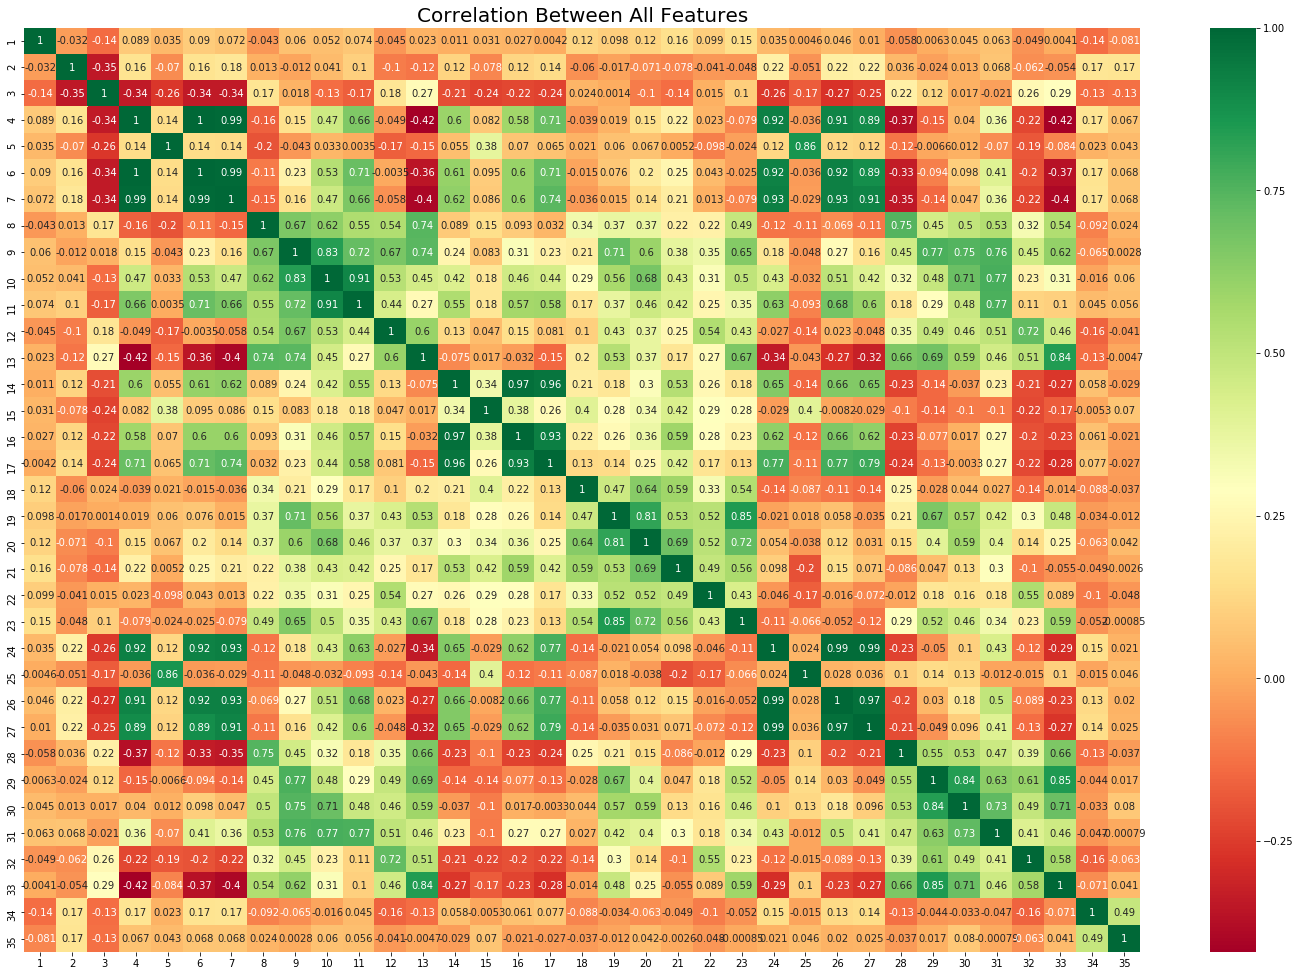

In [7]:
fig = plt.figure(figsize=(25,17))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.title('Correlation Between All Features', size=20)
plt.show()

Leave out the first column (participant’s ID) and the third column (the recurrence time) from the data.

According to the correlation map we find out some columns whose has good correlation. We prefer to remove some of the columns in order to simplify the model:

1. 9, 19 has no correlation with the target column, hence we decide to remove them.

2. 6, 7, 24, 26, 27 has good correlation with column 4 , hence we decide to keep only that column instead of all the others.

3. 16, 17 has good correlation with column 14 , hence we decide to keep only column 14.



In [8]:
data = data.drop([1, 3, 6, 7, 9, 16, 17, 19, 24, 26, 27], axis = 1)
data

,2,4,5,8,10,11,12,13,14,15,...,23,25,28,29,30,31,32,33,34,35
0,-1,18.02,27.60,0.09489,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,...,0.003495,37.08,0.11950,0.19260,0.31400,0.11700,0.2677,0.08113,5.0,5.0
1,-1,17.99,10.38,0.11840,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.006193,17.33,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,3.0,2.0
2,-1,21.37,17.44,0.08836,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,...,0.005039,20.98,0.11880,0.34490,0.34140,0.20320,0.4334,0.09067,2.5,0.0
3,-1,11.42,20.38,0.14250,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.009208,26.50,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,2.0,0.0
4,1,20.29,14.34,0.10030,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.005115,16.67,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,3.5,0.0
5,1,12.75,15.29,0.11890,0.16640,0.07666,0.1995,0.07164,0.3877,0.7402,...,0.005114,20.37,0.17060,0.41960,0.59990,0.17090,0.3485,0.11790,2.5,0.0
7,1,13.71,20.83,0.11890,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,...,0.005412,28.14,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,4.0,10.0
8,-1,13.00,21.82,0.12730,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,...,0.003749,30.73,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,2.0,1.0
9,-1,12.46,24.04,0.11860,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,...,0.010080,40.68,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,6.0,20.0
10,-1,16.02,23.24,0.08206,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,...,0.003042,33.88,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452,2.0,0.0


#### Function for computing the confusing matrix:

In [9]:
def cm_analysis(y_true, y_pred, labels, figsize=(7,6)):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues')
    #plt.savefig(filename)
    plt.show()
    return cm

### Features Scaling & Train-Test Split:

We divide the set into two classes: 66% for training and 33% for testing. 
As we see we have a balancing problem- there much more patients with Non-recurrent than recurrent so we need to take it in account while spliting the data in order to have enough patients with recurrent in the training set but also to have some in the testing. 

In [10]:
scaler = StandardScaler()

X = scaler.fit_transform(data.iloc[:, 1:].values)  
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = random_state)

freqs = pd.DataFrame({"Training dataset": [(y_train == 1).sum(),(y_train == -1).sum()],
                      "Test dataset": [(y_test == 1).sum(),(y_test == -1).sum()],
                      "Total": [(y_train == 1).sum()+(y_test == 1).sum(),(y_train == -1).sum()+(y_test == -1).sum()]},
                     index=["Recurrent", "Nonrecurrent"])
freqs[["Training dataset", "Test dataset", "Total"]]

,Training dataset,Test dataset,Total
Recurrent,28,18,46
Nonrecurrent,101,47,148


 ## (2) Adaline algorithm:

In [11]:
from numpy.random import seed

class Adaline(object):
    """Adaptive Linear Neuron Classifier.

    Parameters:
    ------------
    eta : The learning rate (between 0 and 1)
    n_iter : Passes over the training dataset.
    """
    def __init__(self, eta=0.01, n_iter=10, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        if random_state: 
            seed(random_state)  #  Set random state for shuffling and initializing the weights
    
    def get_params(self, deep=True):
        return {"eta":self.eta, "n_iter": self.n_iter}
    
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : shape = [n_samples, n_features]. Training data, where n_samples is the number of samples and
            n_features is the number of features.
        y : shape = [n_samples]. Target values.
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = target - output
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

### Best Parameters Searching:

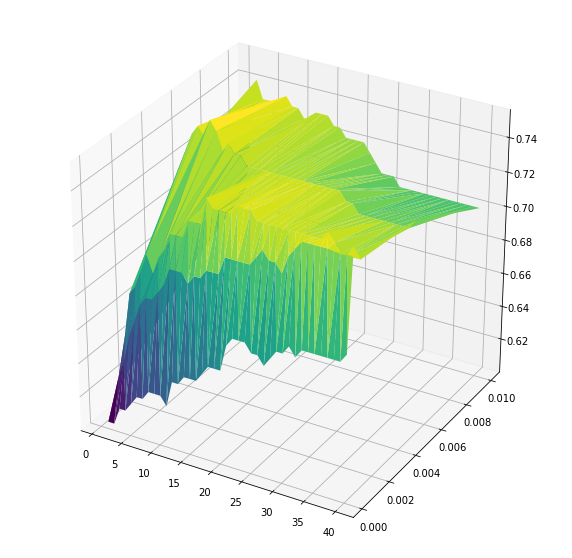

In [12]:
i_range = range(1, 41)
l_range = [0.01,0.005,0.001,0.0005,0.0001]

zdata = []
xdata = []
ydata = []

for i in i_range:
    for l in l_range:
        ada = Adaline(n_iter=i, eta=l, random_state=random_state)
        ada.fit(X_train, y_train)
        y_predict = ada.predict(X_test)
        cv=cross_val_score(ada, X, y, cv=3, scoring='accuracy').mean()
        zdata.append(cv)
        xdata.append(i)
        ydata.append(l)
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(xdata, ydata, zdata, cmap='viridis');


In [13]:
x=0
for i in zdata:
    if(max(zdata) == i):
        break
    x += 1
      
print("best score: ",zdata[x])
print("n_iter: ",xdata[x])
print("eta: ",ydata[x])

best score:  0.7528044871794872
n_iter:  7
eta:  0.005


***Explenation:***

In the graph above we tried to find the best parameters for the Adaline model (using cross-validation).

The light areas refer to the highest socres, so we can conclude that **eta** parameter should be 0.005 and the **n_iter** parameter should be between 7.

### Training the model using Adaline:

In [14]:
st = time.time()
ada = Adaline(n_iter=7, eta=0.005, random_state=random_state)

ada.fit(X_train, y_train)
print("The time for model fitting is: %.2f sec" % (time.time() - st))

The time for model fitting is: 0.01 sec


### Training Results:

In [15]:
y_predict = ada.predict(X_train)
print("Accuracy of Adaline (train): %.2f percents" % (metrics.accuracy_score(y_train, y_predict)*100))

Accuracy of Adaline (train): 81.40 percents


### Testing Results:

In [16]:
y_predict = ada.predict(X_test)
print("Accuracy of Adaline (split): %.2f percents" % (metrics.accuracy_score(y_test, y_predict)*100))
cv=cross_val_score(ada, X, y, cv=3, scoring='accuracy').mean()
print("Accuracy of Adaline (cross-validation): %.2f percents"  % (cv*100))

Accuracy of Adaline (split): 73.85 percents
Accuracy of Adaline (cross-validation): 75.28 percents


In [17]:
print("Standart Deviation of Adaline (cross-validation) %.2f precents" % (cross_val_score(ada, X, y, cv=3, scoring='accuracy').std()*100))

Standart Deviation of Adaline (cross-validation) 3.64 precents


### Calculating Time:

In [18]:
adaTime= time.time() - st
print("The time for getting all the model results: %.2f sec" % (adaTime))

The time for getting all the model results: 0.13 sec


### Confusion Matrix:

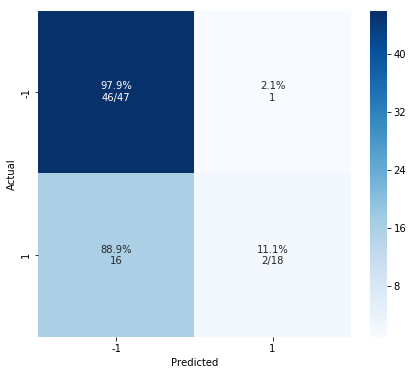

In [19]:
cm = cm_analysis(y_test, y_predict, [-1,1])

In [20]:
confusion = metrics.confusion_matrix(y_test, y_predict)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)

True Positives (TP): 2
True Negatives (TN): 46
False Positives (FP): 1
False Negarives (FN): 16


## (3) Backpropagation algorithm:

### Finding the best parameters for the model using GridSearch:

In [29]:
mlp = MLPClassifier()


parameter_space = {
    'hidden_layer_sizes': [(100,),(120,60,30),(100,50),(80,6),(32,16)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    #'learning_rate': ['constant', 'invscaling','adaptive'],
    'max_iter':[10,100,500, 1000],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 100, 'solver': 'adam'}


### Training the model using Backpropagation:

MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

In [22]:
st = time.time()
clf = MLPClassifier(solver= 'adam',
                    hidden_layer_sizes=(100,),
                    max_iter = 100,
                    learning_rate='invscaling',
                    random_state=random_state)

clf.fit(X_train, y_train)
print("The time for model fitting is: %.2f sec" % (time.time() - st))

The time for model fitting is: 0.11 sec


### Training Results:

In [23]:
y_predict = clf.predict(X_train)
print("Accuracy of BP (train):  %.2f precents" %(metrics.accuracy_score(y_train, y_predict)*100))

Accuracy of BP (train):  85.27 precents


### Testing Results:

In [24]:
y_predict = clf.predict(X_test)
print("Accuracy of BP (split):  %.2f precents" % (metrics.accuracy_score(y_test, y_predict)*100))
cv=cross_val_score(clf, X, y, cv=3, scoring='accuracy').mean()
print("Accuracy of BP (cross-validation) %.2f precents" % (cv*100))

Accuracy of BP (split):  73.85 precents
Accuracy of BP (cross-validation) 74.24 precents


In [25]:
print("Standart Deviation of BP (cross-validation):  %.2f precents "% (cross_val_score(clf, X, y, cv=3, scoring='accuracy').std()*100))

Standart Deviation of BP (cross-validation):  1.67 precents 


### Calculating Time:

In [26]:
bpTime= time.time() - st
print("The time for getting all the model results: %.2f sec" % bpTime)

The time for getting all the model results: 0.87 sec


### Confusion Matrix:

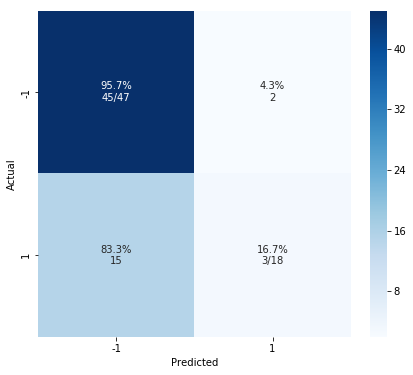

In [27]:
cm = cm_analysis(y_test, y_predict, clf.classes_)

In [28]:
confusion = metrics.confusion_matrix(y_test, y_predict)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)

True Positives (TP): 3
True Negatives (TN): 45
False Positives (FP): 2
False Negarives (FN): 15
